## Checking temperatures on Hall Sensors and electronic systems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
#from sympy import init_printing
%matplotlib inline
#init_printing()

In [2]:
# Modifying the plot style
style.use('seaborn')

### Stage-05 - SENSOR 135-14 : Long-term test (17h) - Water flow: 3L/min - nominal temp. air conditioning: 24°C 

In [3]:
#Data file
_raw_data = pd.read_csv('long_temp_test.txt', sep='\t', header=0)

In [4]:
_raw_data.head()

,Unnamed: 0,Date,Time,101,102,103,105,201,202,203,204,205,206,207,208,209
0,0,05/02/2019,15:31:04,0.4062,0.4202,0.4006,0.4908,22.001,21.246,23.468,23.313,23.607,23.388,23.355,23.576,23.177
1,1,05/02/2019,15:31:07,0.4061,0.4203,0.4007,0.4907,22.020,21.280,23.470,23.309,23.606,23.390,23.353,23.575,23.175
2,2,05/02/2019,15:31:10,0.4060,0.4204,0.4008,0.4906,22.041,21.315,23.466,23.310,23.605,23.386,23.351,23.577,23.169
3,3,05/02/2019,15:31:13,0.4063,0.4204,0.4005,0.4906,22.065,21.344,23.470,23.308,23.606,23.389,23.349,23.574,23.169
4,4,05/02/2019,15:31:16,0.4061,0.4206,0.4008,0.4906,22.085,21.376,23.465,23.310,23.606,23.387,23.347,23.571,23.168


In [5]:
_raw_data.describe()

,Unnamed: 0,101,102,103,105,201,202,203,204,205,206,207,208,209
count,4451.000000,4451.00000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000
mean,2225.000000,0.40023,0.414139,0.394110,0.486713,22.352364,21.598149,22.800782,22.481458,22.892851,22.605702,22.583802,23.376319,22.465987
std,1285.037354,0.00272,0.002854,0.003034,0.002005,0.343904,0.553019,0.356746,0.405678,0.432449,0.386745,0.390530,0.112494,0.353037
min,0.000000,0.39480,0.408700,0.388800,0.478600,21.369000,20.017000,22.397000,22.087000,22.456000,22.215000,22.183000,22.942000,22.096000
25%,1112.500000,0.39830,0.412100,0.391800,0.485900,22.179000,21.396000,22.480000,22.133000,22.501000,22.265000,22.243000,23.324000,22.159000
50%,2225.000000,0.39940,0.413200,0.392900,0.487000,22.422000,21.755000,22.614000,22.216000,22.653000,22.384000,22.346000,23.400000,22.248000
75%,3337.500000,0.40240,0.416500,0.396700,0.487600,22.625000,22.008000,23.159000,22.874000,23.349500,22.974500,22.963000,23.443000,22.817500
max,4450.000000,0.40760,0.421700,0.402100,0.494700,22.898000,22.322000,23.470000,23.313000,23.638000,23.390000,23.355000,23.607000,23.177000


In [6]:
_raw_data['101'][:10]

0    0.4062
1    0.4061
2    0.4060
3    0.4063
4    0.4061
5    0.4063
6    0.4063
7    0.4063
8    0.4063
9    0.4063
Name: 101, dtype: float64

Text(0.5, 1.0, 'Electronic box 135-14')

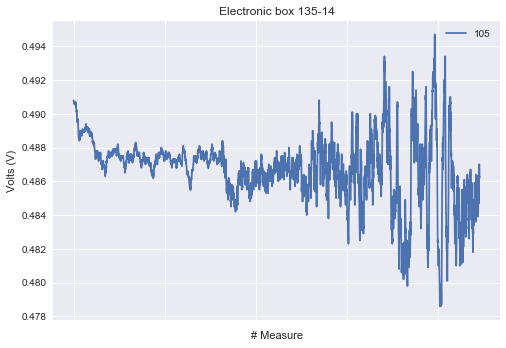

In [7]:
#Plotting files
ax = _raw_data.plot(x='Time', y='105', style='-')
ax.set_xlabel('# Measure')
ax.set_ylabel('Volts (V)')
ax.set_title('Electronic box 135-14')

Text(0, 0.5, 'Volts (V)')

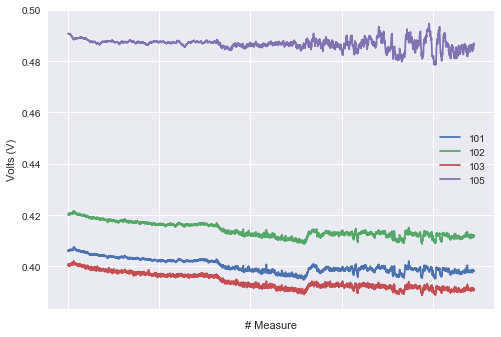

In [8]:
#Sensors and Electronics Temperature
ax = _raw_data.plot(x='Time', y='101', style='-')
_raw_data.plot(ax=ax, x='Time', y='102', style='-' )
_raw_data.plot(ax=ax, x='Time', y='103', style='-' )
_raw_data.plot(ax=ax, x='Time', y='105', style='-' )
ax.set_xlabel('# Measure')
ax.set_ylabel('Volts (V)')

In [9]:
#Sensors temperature parameters
_dict_sensors = {'101': [0.05, 0.09, 0.03],
                 '102': [0.05, 0.09, 0.03],
                 '103': [0.02, 0.05, 0.03],
                 '105': [0.03, 0.03, 0]}

def general_convert(number, sensor, data):
    '''Returns volts to temperature conversion'''
    number = str(number)
    _converte = pd.Series()
    if sensor == 135:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][0])/0.02)
            return _converte
        else:
            return False
    elif sensor == 133:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][1])/0.02)
            return _converte
        else:
            return False
    elif sensor == 134:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][1])/0.02)
            return _converte
        else:
            return False
    else:
        return False

In [10]:
general_convert(105, 135,_raw_data).head()

0    23.040
1    23.035
2    23.030
3    23.030
4    23.030
Name: 105, dtype: float64

In [11]:
_temp_X = general_convert(101, 135,_raw_data)
_temp_Y = general_convert(102, 135,_raw_data)
_temp_Z = general_convert(103, 135,_raw_data)
_temp_box = general_convert(105, 135,_raw_data)

Text(0.5, 1.0, 'Temperature Electronic box 135-14')

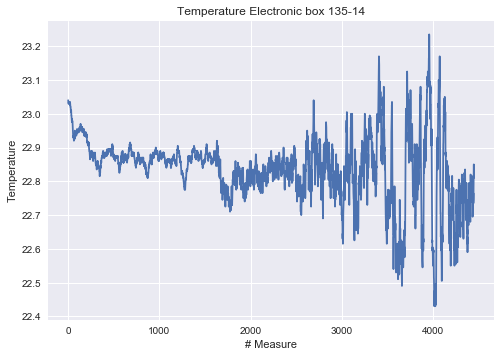

In [12]:
ax1 = _temp_box.plot(x=_temp_X.index, style='-')
ax1.set_xlabel('# Measure')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature Electronic Bastidor 135-14')

In [13]:
#Mean value of X,Y,Z sensors combined
def avg_values(x, y, z):
    '''Returns average values of the sensors X, Y, Z'''
    _avg_values = pd.Series()
    _avg_values = ((x + y + z)/3)
    return _avg_values

In [14]:
avg_values(_temp_X, _temp_Y, _temp_Z).head()

0    18.450000
1    18.451667
2    18.453333
3    18.453333
4    18.458333
dtype: float64

In [15]:
_avg_sensors = avg_values(_temp_X, _temp_Y, _temp_Z)

In [16]:
#Compare mean temperature values of sensors and box
list_of_series = [_avg_sensors, _temp_box]
_df_compare = pd.concat(list_of_series, axis=1)
_df_compare.columns = ['avg_temp_sensors', 'box_temp']

#Add time and date in _df_compare
_df_compare['Time'] = pd.Series(_raw_data['Time'], index=_df_compare.index)
_df_compare['Date'] = pd.Series(_raw_data['Date'], index=_df_compare.index)
_df_compare.head()

,avg_temp_sensors,box_temp,Time,Date
0,18.450000,23.040,15:31:04,05/02/2019
1,18.451667,23.035,15:31:07,05/02/2019
2,18.453333,23.030,15:31:10,05/02/2019
3,18.453333,23.030,15:31:13,05/02/2019
4,18.458333,23.030,15:31:16,05/02/2019


Text(0, 0.5, 'Temperature (°C)')

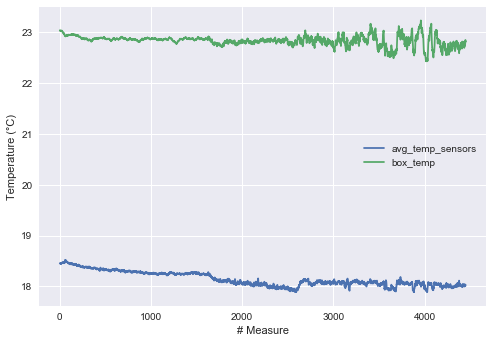

In [17]:
#Plotting
ax = _df_compare.plot(y='avg_temp_sensors', style='-')
_df_compare.plot(ax=ax, y='box_temp', style='-')
ax.set_xlabel('# Measure')
ax.set_ylabel('Temperature (°C)')

In [18]:
_df_compare.describe()

,avg_temp_sensors,box_temp
count,4451.000000,4451.000000
mean,18.141307,22.835646
std,0.142694,0.100263
min,17.885000,22.430000
25%,18.036667,22.795000
50%,18.088333,22.850000
75%,18.260000,22.880000
max,18.523333,23.235000


In [19]:
#Difference between mean values
_diff_mean = abs(_df_compare['avg_temp_sensors'].mean()-_df_compare['box_temp'].mean())
print('%0.3f' % _diff_mean)

4.694


In [20]:
#Peak-valley difference sensors average values
p_k_diff = _df_compare['avg_temp_sensors'].max()-_df_compare['avg_temp_sensors'].min()
print('%0.3f' % p_k_diff)

0.638


In [21]:
#Peak-valley difference box temperature values
p_k_box = _df_compare['box_temp'].max()-_df_compare['box_temp'].min()
print('%0.3f' % p_k_box)

0.805


In [22]:
#mean relative error for box temp
_rel = (_df_compare['box_temp'].max()/_df_compare['box_temp'].mean())-1
print('%0.4f' % _rel)

0.0175


In [23]:
#Locate maximum temperature value in 'box_temp'
_df_compare.loc[_df_compare['box_temp'] == 23.235000]

,avg_temp_sensors,box_temp,Time,Date
3959,18.041667,23.235,05:55:26,06/02/2019


In [24]:
_raw_data.iloc[3959]

Unnamed: 0          3959
Date          06/02/2019
Time            05:55:26
101               0.3986
102               0.4123
103               0.3916
105               0.4947
201               21.773
202               21.319
203               22.491
204               22.126
205               22.479
206               22.274
207               22.229
208               23.291
209               22.104
Name: 3959, dtype: object

In [25]:
_df_compare.tail()

,avg_temp_sensors,box_temp,Time,Date
4446,18.003333,22.800,08:37:53,06/02/2019
4447,18.013333,22.840,08:38:12,06/02/2019
4448,18.015000,22.850,08:38:32,06/02/2019
4449,18.020000,22.810,08:38:53,06/02/2019
4450,18.030000,22.815,08:39:12,06/02/2019


In [26]:
def more_than(df, name, val):
    '''df = DataFrame, name = column, val = value to compare'''
    _df_aux = pd.DataFrame()
    name = str(name)
    for i in range(len(df)):
        if df.iloc[i][name] > val:
            _df_aux = _df_aux.append(df.iloc[i])
    return _df_aux

# def more_than_progressive(df, name, val):
#     name = str(name)
#     _max = df[name].max()

In [27]:
#0.490 V <=> 23.00 °C
more_than(_df_compare,'box_temp', 23.03)[:10]
#more_than(_raw_data,'105', 0.49)

,Date,Time,avg_temp_sensors,box_temp
0,05/02/2019,15:31:04,18.450000,23.040
1,05/02/2019,15:31:07,18.451667,23.035
7,05/02/2019,15:31:25,18.460000,23.035
13,05/02/2019,15:31:43,18.458333,23.035
20,05/02/2019,15:32:04,18.460000,23.035
21,05/02/2019,15:32:07,18.455000,23.035
2692,05/02/2019,22:52:51,18.138333,23.040
3402,06/02/2019,02:49:40,18.105000,23.050
3403,06/02/2019,02:50:00,18.126667,23.045
3404,06/02/2019,02:50:20,18.145000,23.085


In [28]:
#_df_compare['box_temp'].value_counts()

### Stage 08: SENSOR 133-14 - Water flow: 3L/min - nominal temp. air conditioning: 24°C 

In [29]:
#Import data files
_133_data_temp = pd.read_csv('sensor_13314_air_ON_temp.txt', sep='\t', header=0)
_133_data_volts = pd.read_csv('sensor_13314_air_ON_volts.txt', sep='\t', header=0)

In [30]:
_133_data_temp.describe()

,Unnamed: 0,101,102,103,105,201,202,203,204,205,206,207,208,209
count,1079.000000,1079.000000,1079.00000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,539.000000,0.443062,0.44799,0.458772,0.503583,22.352998,21.717802,22.535774,22.195050,22.589738,22.351155,22.305143,23.248605,22.227427
std,311.624774,0.001490,0.00151,0.001428,0.000781,0.293653,0.460040,0.023069,0.036031,0.031478,0.030671,0.034156,0.053062,0.034455
min,0.000000,0.440200,0.44460,0.456000,0.501900,21.487000,20.390000,22.492000,22.127000,22.544000,22.297000,22.244000,23.172000,22.152000
25%,269.500000,0.442000,0.44690,0.457800,0.503000,22.198000,21.524000,22.519000,22.170000,22.558000,22.329000,22.281000,23.214000,22.205000
50%,539.000000,0.442800,0.44770,0.458500,0.503500,22.406000,21.808000,22.534000,22.190000,22.586000,22.345000,22.298000,23.239000,22.228000
75%,808.500000,0.443800,0.44880,0.459500,0.504100,22.609500,22.111000,22.552000,22.218000,22.620000,22.374000,22.327000,23.264000,22.250000
max,1078.000000,0.448700,0.45360,0.464000,0.505600,22.763000,22.273000,22.593000,22.293000,22.652000,22.424000,22.417000,23.500000,22.324000


In [31]:
_133_data_volts.describe()

,Unnamed: 0,Position,X[mV],Y[mV],Z[mV]
count,1078.000000,0.0,1078.000000,1078.000000,1078.000000
mean,538.500000,NaN,-484.630282,-15547.504384,511.103675
std,311.336099,NaN,0.160908,0.677482,0.107407
min,0.000000,NaN,-485.049474,-15549.397330,510.793338
25%,269.250000,NaN,-484.744230,-15548.023058,511.029353
50%,538.500000,NaN,-484.643375,-15547.633930,511.131634
75%,807.750000,NaN,-484.521788,-15546.934230,511.187016
max,1077.000000,NaN,-484.170608,-15545.834650,511.288212


In [32]:
# Converting volts in temperature    
_133_X = general_convert(101, 133, _133_data_temp)
_133_Y = general_convert(102, 133, _133_data_temp)
_133_Z = general_convert(103, 133, _133_data_temp)
_133_box = general_convert(105, 133, _133_data_temp)

In [33]:
_133_X.tail(5)

1074    17.635
1075    17.645
1076    17.655
1077    17.650
1078    17.635
Name: 101, dtype: float64

In [34]:
#Mean value of X,Y,Z sensors
avg_values(_133_X, _133_Y, _133_Z).head()

0    18.886667
1    18.901667
2    18.903333
3    18.916667
4    18.926667
dtype: float64

In [35]:
_avg_sensors_133 = avg_values(_133_X, _133_Y, _133_Z)

#Compare mean temperature values of the sensors and box
list_of_series = [_avg_sensors_133, _133_box]
_df_compare133 = pd.concat(list_of_series, axis=1)
_df_compare133.columns = ['avg_temp_sensors', 'box_temp']

#Add time and date in _df_compare
_df_compare133['Time'] = pd.Series(_133_data_temp['Time'], index=_df_compare133.index)
_df_compare133['Date'] = pd.Series(_133_data_temp['Date'], index=_df_compare133.index)
_df_compare133.head()

,avg_temp_sensors,box_temp,Time,Date
0,18.886667,23.660,09:47:33,07/02/2019
1,18.901667,23.660,09:47:43,07/02/2019
2,18.903333,23.645,09:47:53,07/02/2019
3,18.916667,23.640,09:48:03,07/02/2019
4,18.926667,23.635,09:48:13,07/02/2019


Mean avg sensors: 18.664
Mean temp box: 23.679


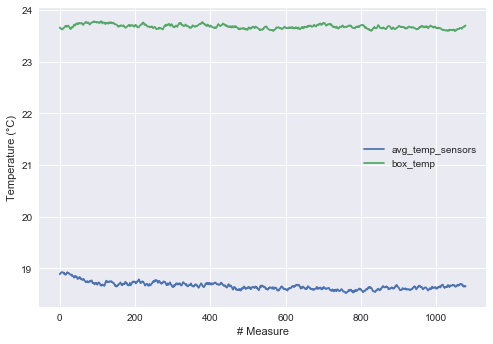

In [36]:
#Plotting
ax = _df_compare133.plot(y='avg_temp_sensors', style='-')
_df_compare133.plot(ax=ax, y='box_temp', style='-')
ax.set_xlabel('# Measure')
ax.set_ylabel('Temperature (°C)')
print('Mean avg sensors: %0.3f' % _df_compare133['avg_temp_sensors'].mean())
print('Mean temp box: %0.3f' % _df_compare133['box_temp'].mean())

In [37]:
_df_compare133.describe()

,avg_temp_sensors,box_temp
count,1079.000000,1079.000000
mean,18.663733,23.679133
std,0.073505,0.039069
min,18.521667,23.595000
25%,18.610000,23.650000
50%,18.651667,23.675000
75%,18.701667,23.705000
max,18.930000,23.780000


In [38]:
#Difference between mean values
_diff_mean133 = abs(_df_compare133['avg_temp_sensors'].mean()-_df_compare133['box_temp'].mean())
#print('%0.3f' % _diff_mean133)
round(_diff_mean133,4)

In [39]:
#Peak-valley difference sensors average values
p_k_diff_133 = _df_compare133['avg_temp_sensors'].max()-_df_compare133['avg_temp_sensors'].min()
#print('%0.3f' % p_k_diff_133)
round(p_k_diff_133,4)

In [40]:
#Peak-valley difference box temperature values
p_k_box_133 = _df_compare133['box_temp'].max()-_df_compare133['box_temp'].min()
#print('%0.3f' % p_k_box_133)
round(p_k_box_133,4)

In [41]:
#mean relative error for box temp
_rel_133 = (_df_compare133['box_temp'].max()/_df_compare133['box_temp'].mean())-1
#print('%0.4f' % _rel_133)
round(_rel_133,4)

In [42]:
#Compare temperature boxes 135 and 133
lista = [_df_compare['box_temp'], _df_compare133['box_temp']]
temp_boxes = pd.concat(lista, axis=1)
temp_boxes.columns = ['box_temp_135', 'box_temp_133']
temp_boxes.head()

,box_temp_135,box_temp_133
0,23.040,23.660
1,23.035,23.660
2,23.030,23.645
3,23.030,23.640
4,23.030,23.635


In [43]:
# ax4 = temp_boxes.plot(y='box_temp_135', style='-')
# temp_boxes.plot(ax = ax4, y='box_temp_133', style='-')

In [44]:
print(len(_df_compare['box_temp']))
print(len(_df_compare133['box_temp']))

4451
1079


## Magnetic Field with voltmeters data of the sensor 133-14

In [45]:
_133_data_volts.head()

,Unnamed: 0,Date,Time,Position,X[mV],Y[mV],Z[mV]
0,0,07/02/2019,09:47:40,NaN,-484.335966,-15548.19733,510.921978
1,1,07/02/2019,09:47:50,NaN,-484.354143,-15547.89510,510.928966
2,2,07/02/2019,09:48:00,NaN,-484.277874,-15547.75354,510.935035
3,3,07/02/2019,09:48:10,NaN,-484.269014,-15547.99186,510.958672
4,4,07/02/2019,09:48:20,NaN,-484.392330,-15548.15003,510.908544


In [46]:
def submultiple(df, name):
    '''Convert mV in V'''
    _val = pd.Series()
    name = str(name)
    _val = df[name]*1e-03
    return _val

_133_data_volts['X[mV]'] = submultiple(_133_data_volts, 'X[mV]')
_133_data_volts['Y[mV]'] = submultiple(_133_data_volts, 'Y[mV]')
_133_data_volts['Z[mV]'] = submultiple(_133_data_volts, 'Z[mV]')

In [47]:
_133_data_volts.head()

,Unnamed: 0,Date,Time,Position,X[mV],Y[mV],Z[mV]
0,0,07/02/2019,09:47:40,NaN,-0.484336,-15.548197,0.510922
1,1,07/02/2019,09:47:50,NaN,-0.484354,-15.547895,0.510929
2,2,07/02/2019,09:48:00,NaN,-0.484278,-15.547754,0.510935
3,3,07/02/2019,09:48:10,NaN,-0.484269,-15.547992,0.510959
4,4,07/02/2019,09:48:20,NaN,-0.484392,-15.548150,0.510909


In [48]:
'''Create DataFrame with temp(in volts) and field(in volts) for comparison'''

#Drop last row of _133_data_temp for same length in both arrays
#_133_data_temp.drop(_133_data_temp.index[1078], inplace=True)

#Creating list of Series
listSeries = [_133_data_temp['101'], _133_data_volts['X[mV]'],
              _133_data_temp['102'], _133_data_volts['Y[mV]'],
              _133_data_temp['103'], _133_data_volts['Z[mV]']]

#DF temperature and filed X, Y, Z
_df_temp_field = pd.concat(listSeries, axis=1)
_df_temp_field.columns = ['101(X)', 'X', '102(Y)', 'Y', '103(Z)', 'Z']

In [49]:
_df_temp_field.head()

,101(X),X,102(Y),Y,103(Z),Z
0,0.4476,-0.484336,0.4525,-15.548197,0.4631,0.510922
1,0.4480,-0.484354,0.4529,-15.547895,0.4632,0.510929
2,0.4480,-0.484278,0.4527,-15.547754,0.4635,0.510935
3,0.4482,-0.484269,0.4531,-15.547992,0.4637,0.510959
4,0.4483,-0.484392,0.4534,-15.548150,0.4639,0.510909


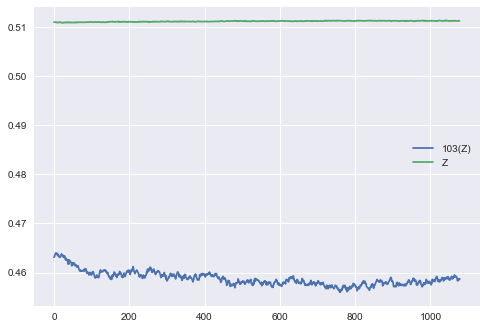

In [50]:
ax3 = _df_temp_field.plot(y='103(Z)', style='-')
_df_temp_field.plot(ax=ax3, y='Z', style='-')
# _df_temp_field.plot(ax=ax3, y='103(Z)', style='-')
# _df_temp_field.plot(ax=ax3, y='Z', style='-')

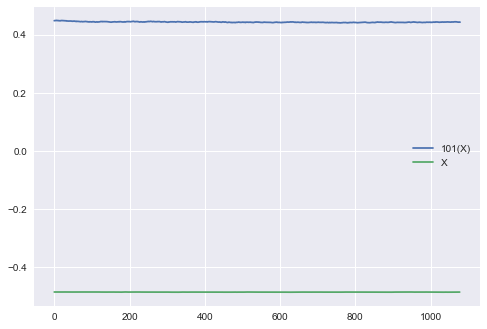

In [51]:
ax3 = _df_temp_field.plot(y='101(X)', style='-')
_df_temp_field.plot(ax=ax3, y='X', style='-')

### Stage 10: SENSOR 133-14 Long-term test - Water flow: 3L/min - nominal temp. air conditioning: 24°C 

In [52]:
#Import data files
_133_longterm_t = pd.read_csv('sensor_13314_air_ON_temp_II.txt', sep='\t', header=0)
_133_longterm_v = pd.read_csv('sensor_13314_air_ON_volts_II.txt', sep='\t', header=0)

In [53]:
_133_longterm_t.head()

,Unnamed: 0,Date,Time,101,102,103,105,201,202,203,204,205,206,207,208,209
0,0,07/02/2019,09:47:33,0.4476,0.4525,0.4631,0.5032,22.679,22.119,22.589,22.293,22.645,22.414,22.417,23.500,22.323
1,1,07/02/2019,09:47:43,0.4480,0.4529,0.4632,0.5032,22.688,22.125,22.588,22.292,22.644,22.417,22.413,23.499,22.324
2,2,07/02/2019,09:47:53,0.4480,0.4527,0.4635,0.5029,22.703,22.139,22.588,22.291,22.647,22.420,22.410,23.490,22.321
3,3,07/02/2019,09:48:03,0.4482,0.4531,0.4637,0.5028,22.701,22.144,22.589,22.286,22.645,22.417,22.407,23.459,22.320
4,4,07/02/2019,09:48:13,0.4483,0.4534,0.4639,0.5027,22.706,22.152,22.588,22.286,22.648,22.420,22.405,23.458,22.318


In [54]:
# Converting volts in temperature    
_133_X_long = general_convert(101, 133, _133_longterm_t)
_133_Y_long = general_convert(102, 133, _133_longterm_t)
_133_Z_long = general_convert(103, 133, _133_longterm_t)
_133_box_long = general_convert(105, 133, _133_longterm_t)

In [55]:
#Catches average values of the sensors
_avg_133_long = avg_values(_133_X_long, _133_Y_long, _133_Z_long)

#Creating Data Frame for compare mean temperature values of the sensors and box
combined = [_avg_133_long, _133_box_long]
_df_compare133_long = pd.concat(combined, axis=1)
_df_compare133_long.columns = ['avg_temp_sensors', 'box_temp']

#Add time and date in _df_compare133_long
_df_compare133_long['Time'] = pd.Series(_133_longterm_t['Time'], index=_df_compare133_long.index)
_df_compare133_long['Date'] = pd.Series(_133_longterm_t['Date'], index=_df_compare133_long.index)
_df_compare133_long.head()

,avg_temp_sensors,box_temp,Time,Date
0,18.886667,23.660,09:47:33,07/02/2019
1,18.901667,23.660,09:47:43,07/02/2019
2,18.903333,23.645,09:47:53,07/02/2019
3,18.916667,23.640,09:48:03,07/02/2019
4,18.926667,23.635,09:48:13,07/02/2019


Text(17.246875000000003, 0.5, 'Temperature (°C)')

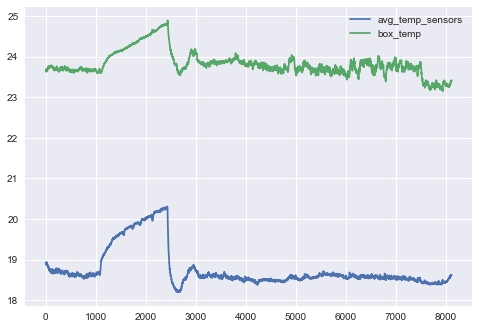

In [56]:
#Plotting
_lu = _df_compare133_long.plot(y='avg_temp_sensors', style='-')
_df_compare133_long.plot(ax=_lu, y='box_temp', style='-')
ax.set_xlabel('# Measure')
ax.set_ylabel('Temperature (°C)')

In [57]:
_df_compare133_long.describe()

,avg_temp_sensors,box_temp
count,8119.000000,8119.000000
mean,18.766287,23.820677
std,0.491297,0.307875
min,18.195000,23.150000
25%,18.516667,23.665000
50%,18.580000,23.760000
75%,18.675000,23.895000
max,20.306667,24.890000


In [58]:
#Locate maximum temperature value in 'box_temp'
_df_compare133_long.loc[_df_compare133_long['box_temp'] == 24.890000]

,avg_temp_sensors,box_temp,Time,Date
2437,20.18,24.89,16:46:36,07/02/2019


In [59]:
#Locate minimum
_df_compare133_long.loc[_df_compare133_long['avg_temp_sensors'] < 18.20]

,avg_temp_sensors,box_temp,Time,Date
2647,18.198333,23.635,17:21:38,07/02/2019
2648,18.195000,23.640,17:21:48,07/02/2019
2680,18.198333,23.560,17:27:08,07/02/2019


In [60]:
#Difference between mean values
_diff_mean133_long = abs(_df_compare133_long['avg_temp_sensors'].mean()-_df_compare133_long['box_temp'].mean())
print('%0.3f' % _diff_mean133_long)

5.054


In [61]:
#Shift offset avg sensor values
_shift_avg_sensor = _df_compare133_long['avg_temp_sensors'] + 5.054
_shift_avg_sensor.head()

0    23.940667
1    23.955667
2    23.957333
3    23.970667
4    23.980667
Name: avg_temp_sensors, dtype: float64

In [62]:
#difference between shifted values and box_temp values
_difference = _shift_avg_sensor - _df_compare133_long['box_temp']

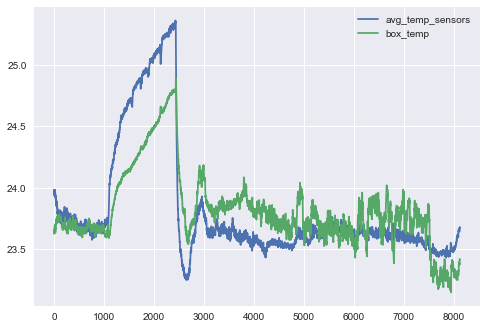

In [63]:
#Plotting shift values
fig, ax = plt.subplots()
#ax.plot_date(_df_compare133_long['Time'], _shift_avg_sensor, 'b-')
ax.plot(_df_compare133_long.index, _shift_avg_sensor)
ax.plot(_df_compare133_long.index, _df_compare133_long['box_temp'])
ax.legend(loc='best')
ax.grid(True)

In [64]:
#Slice Data Frame for get values without ramp (over 5000)
_slice_df = _df_compare133_long[5000:]

In [65]:
_slice_df.head()

,avg_temp_sensors,box_temp,Time,Date
5000,18.580000,23.610,23:54:08,07/02/2019
5001,18.580000,23.595,23:54:18,07/02/2019
5002,18.573333,23.595,23:54:28,07/02/2019
5003,18.565000,23.575,23:54:38,07/02/2019
5004,18.558333,23.585,23:54:48,07/02/2019


In [66]:
_slice_df.tail()

,avg_temp_sensors,box_temp,Time,Date
8114,18.618333,23.390,08:33:34,08/02/2019
8115,18.615000,23.390,08:33:44,08/02/2019
8116,18.621667,23.420,08:33:54,08/02/2019
8117,18.625000,23.405,08:34:04,08/02/2019
8118,18.626667,23.415,08:34:14,08/02/2019


In [67]:
_slice_df.describe()

,avg_temp_sensors,box_temp
count,3119.000000,3119.000000
mean,18.542983,23.637764
std,0.067335,0.195288
min,18.376667,23.150000
25%,18.511667,23.560000
50%,18.551667,23.680000
75%,18.591667,23.775000
max,18.708333,24.020000


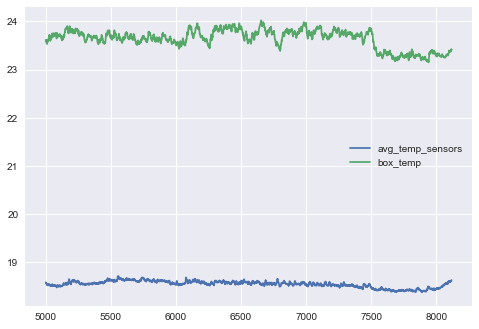

In [68]:
cas = _slice_df.plot(y='avg_temp_sensors', style='-')
_slice_df.plot(ax = cas, y='box_temp', style='-')
#_slice_df.plot(ax =cas, y=_slice_df['avg_temp_sensors'].max(), style='r--')

### Stage 11: SENSOR 133-14 Long-term test - ventilation on electronic - Water flow: 3L/min - nominal temp. air conditioning: 24°C 

In [69]:
_133_vent = pd.read_csv('sensor_13314_air_ON_temp_III.txt', sep='\t', header=0)

In [70]:
# Converting volts in temperature    
_133_vent_X = general_convert(101, 133, _133_vent)
_133_vent_Y = general_convert(102, 133, _133_vent)
_133_vent_Z = general_convert(103, 133, _133_vent)
_133_vent_box = general_convert(105, 133, _133_vent)

In [71]:
#Catches average values of the sensors
_avg_133_vent = avg_values(_133_vent_X, _133_vent_Y, _133_vent_Z)

#Creating Data Frame for compare average temperature values of the sensors and box
combined = [_avg_133_vent, _133_vent_box]
_df_compare133_vent = pd.concat(combined, axis=1)
_df_compare133_vent.columns = ['avg_temp_sensors', 'box_temp']

#Add time and date in _df_compare133_long
_df_compare133_vent['Time'] = pd.Series(_133_vent['Time'], index=_df_compare133_vent.index)
_df_compare133_vent['Date'] = pd.Series(_133_vent['Date'], index=_df_compare133_vent.index)
_df_compare133_vent.head()

,avg_temp_sensors,box_temp,Time,Date
0,18.866667,23.550,08:56:10,08/02/2019
1,18.861667,23.570,08:56:20,08/02/2019
2,18.853333,23.570,08:56:30,08/02/2019
3,18.836667,23.575,08:56:40,08/02/2019
4,18.820000,23.580,08:56:50,08/02/2019


Text(3.200000000000003, 0.5, 'Temperature (°C)')

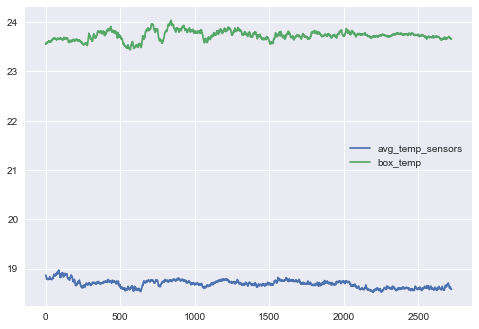

In [72]:
#Plotting
_lu = _df_compare133_vent.plot(y='avg_temp_sensors', style='-')
_df_compare133_vent.plot(ax=_lu, y='box_temp', style='-')
ax.set_xlabel('# Measure')
ax.set_ylabel('Temperature (°C)')

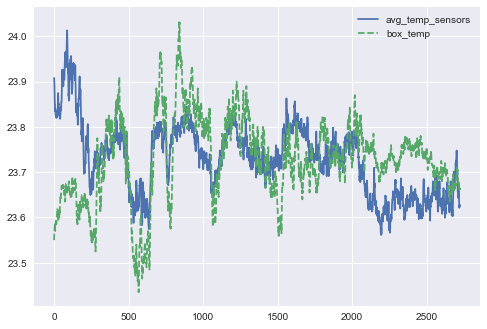

In [73]:
#Shift avg_temp_sensors
_shift_avg_sensor133 = _df_compare133_vent['avg_temp_sensors'] + 5.041314

#Plotting shifted axis and box_temp
fig, ax = plt.subplots()
ax.plot(_df_compare133_vent.index, _shift_avg_sensor133)
ax.plot(_df_compare133_vent.index, _df_compare133_vent['box_temp'], '--')
ax.legend(loc='best')
ax.grid(True)

In [74]:
_shift_avg_sensor133.head()

0    23.907981
1    23.902981
2    23.894647
3    23.877981
4    23.861314
Name: avg_temp_sensors, dtype: float64

In [75]:
_df_compare133_vent.describe()

,avg_temp_sensors,box_temp
count,2724.000000,2724.000000
mean,18.687148,23.728462
std,0.077216,0.091722
min,18.520000,23.435000
25%,18.620000,23.675000
50%,18.691667,23.730000
75%,18.740000,23.790000
max,18.971667,24.035000


In [76]:
#Mean diff
abs(_df_compare133_vent['avg_temp_sensors'].mean() - _df_compare133_vent['box_temp'].mean())

### Stage 12: SENSOR 134-14 Long-term test - ventilation on electronic - Water flow: 3L/min - nominal temp. air conditioning: 24°C 

In [77]:
#Import data files
_134_longterm_t = pd.read_csv('sensor_13414_air_ON_temp.txt', sep='\t', header=0)
_134_longterm_v = pd.read_csv('sensor_13414_air_ON_volts.txt', sep='\t', header=0)

In [78]:
# Converting volts in temperature    
_134_X = general_convert(101, 134, _134_longterm_t)
_134_Y = general_convert(102, 134, _134_longterm_t)
_134_Z = general_convert(103, 134, _134_longterm_t)
_134_box = general_convert(105, 134, _134_longterm_t)

In [79]:
#Catches average values of the sensors
_avg_134_temp = avg_values(_134_X, _134_Y, _134_Z)

#Creating Data Frame for compare average temperature values of the sensors and box
combined = [_avg_134_temp, _134_box]
_df_compare134 = pd.concat(combined, axis=1)
_df_compare134.columns = ['avg_temp_sensors', 'box_temp']

#Add time and date in _df_compare133_long
_df_compare134['Time'] = pd.Series(_134_longterm_t['Time'], index=_df_compare134.index)
_df_compare134['Date'] = pd.Series(_134_longterm_t['Date'], index=_df_compare134.index)
_df_compare134.head()

,avg_temp_sensors,box_temp,Time,Date
0,15.900000,23.910,14:06:35,11/02/2019
1,15.908333,23.900,14:06:45,11/02/2019
2,15.883333,23.915,14:06:55,11/02/2019
3,15.878333,23.925,14:07:05,11/02/2019
4,15.848333,23.930,14:07:15,11/02/2019


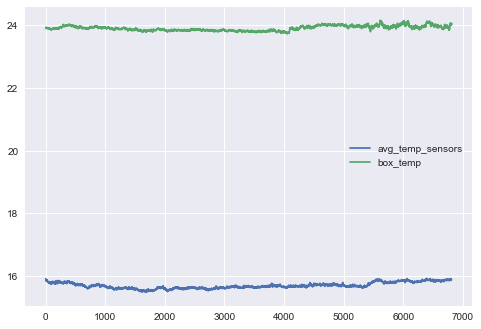

In [80]:
pl = _df_compare134.plot()

In [81]:
_df_compare134.describe()

,avg_temp_sensors,box_temp
count,6812.000000,6812.000000
mean,15.691341,23.911151
std,0.095441,0.078690
min,15.478333,23.745000
25%,15.621667,23.845000
50%,15.671667,23.905000
75%,15.771667,23.970000
max,15.916667,24.160000


In [82]:
#Mean diff
abs(_df_compare134['avg_temp_sensors'].mean() - _df_compare134['box_temp'].mean())

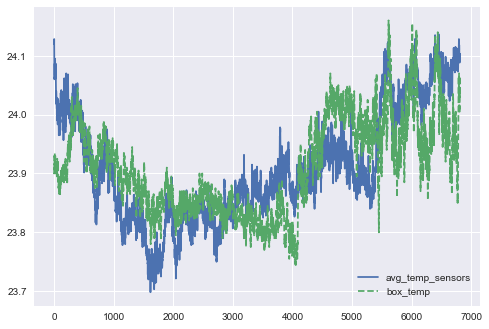

In [83]:
#Shift avg_temp_sensors
_shift_avg_sensor134 = _df_compare134['avg_temp_sensors'] + 8.220

#Plotting shifted axis and box_temp
fig, ax = plt.subplots()
ax.plot(_df_compare134.index, _shift_avg_sensor134)
ax.plot(_df_compare134.index, _df_compare134['box_temp'], '--')
ax.legend(loc='best')
ax.grid(True)

### Max - Min box temp values

In [84]:
round(_df_compare134['box_temp'].max() - _df_compare134['box_temp'].min(), 4)

### Max - Min average sensors values

In [85]:
round(_df_compare134['avg_temp_sensors'].max() - _df_compare134['avg_temp_sensors'].min(), 4)

In [86]:
len(_df_compare134)

## Comparation between sensors 135/133/134

In [87]:
#Box temperature of the 135-14
print(_temp_box.__len__())

#Box temperature of the 133-14
_tb_133_slice = _df_compare133_long['box_temp'][3668:] #same length for both arrays
print(_tb_133_slice.__len__())
_tb_133_slice.index = pd.Index(np.arange(1,4452))

#Box temperature of the 135-14
_tb_135_slice = _df_compare134['box_temp'][:4451]
print(_tb_135_slice.__len__())

lista = [_temp_box, _tb_133_slice, _tb_135_slice]

_df_boxes_temps = pd.concat(lista, axis=1)
_df_boxes_temps.columns =['box_temp_135', 'box_temp_133', 'box_temp_134']

4451
4451
4451


In [88]:
_df_boxes_temps.head()

,box_temp_135,box_temp_133,box_temp_134
0,23.040,NaN,23.910
1,23.035,23.925,23.900
2,23.030,23.920,23.915
3,23.030,23.900,23.925
4,23.030,23.915,23.930


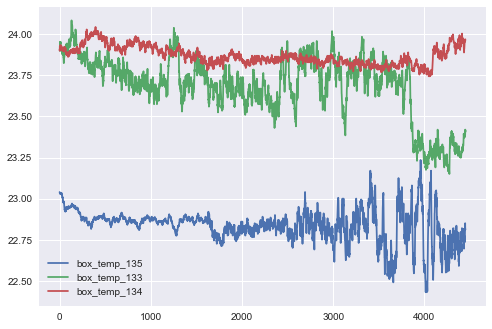

In [89]:
_df_boxes_temps.plot()

In [90]:
_df_boxes_temps.describe()

,box_temp_135,box_temp_133,box_temp_134
count,4451.000000,4451.000000,4451.000000
mean,22.835646,23.685773,23.870531
std,0.100263,0.187800,0.056492
min,22.430000,23.150000,23.745000
25%,22.795000,23.620000,23.830000
50%,22.850000,23.720000,23.860000
75%,22.880000,23.815000,23.910000
max,23.235000,24.085000,24.045000


In [91]:
#Mean diff
_df_boxes_temps['box_temp_135'].mean() - _df_boxes_temps['box_temp_133'].mean()

In [92]:
_df_boxes_temps['box_temp_133'].mean() - _df_boxes_temps['box_temp_134'].mean()

In [94]:
#Diff between max e min
_df_boxes_temps['box_temp_134'].max() - _df_boxes_temps['box_temp_134'].min()